# Census Income Project
Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight) The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impoting file & data
df=pd.read_csv("Census_income")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#most of the data is in oobject types. We have to convert this into integer/Float for further analysis
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [4]:
#Lets check the unique values
print("Distinct values of each column")
for column in df:
    print(f'- {column}: {df[column].unique()}')

Distinct values of each column
- Age: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
- Workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
- Fnlwgt: [ 83311 215646 234721 ...  34066  84661 257302]
- Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
- Education_num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
- Marital_status: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
- Occupation: [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'

In [5]:
df.head().T

,0,1,2,3,4
Age,50,38,53,28,37
Workclass,Self-emp-not-inc,Private,Private,Private,Private
Fnlwgt,83311,215646,234721,338409,284582
Education,Bachelors,HS-grad,11th,Bachelors,Masters
Education_num,13,9,7,13,14
Marital_status,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Occupation,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Relationship,Husband,Not-in-family,Husband,Wife,Wife
Race,White,White,Black,Black,White
Sex,Male,Male,Male,Female,Female


# Exploratory data analysis for better understaning & cleaning the data

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

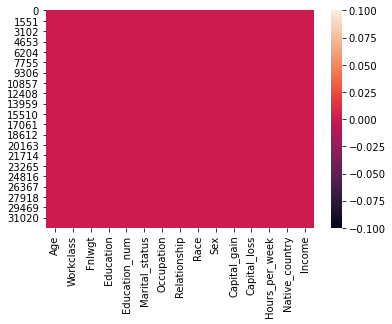

In [7]:
sns.heatmap(df.isnull()) # No Null Value

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Looking at the data seems liks there is a huge skewness available in the data and all the columns have huge vriation between the 75% data and the maximum data. lso the  capital gain and capital loss the mean is greater than median that means the data is rightly skewed. 

<AxesSubplot:xlabel='Age', ylabel='Density'>

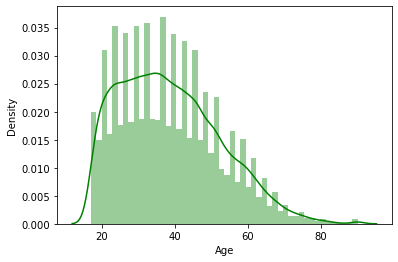

In [9]:
sns.distplot(x=df['Age'], axlabel='Age', color='Green')

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

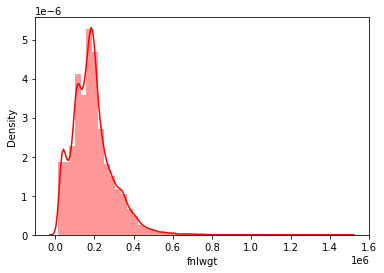

In [10]:
sns.distplot(x=df['Fnlwgt'], axlabel='fnlwgt', color='Red')

<AxesSubplot:xlabel='Education Number', ylabel='Density'>

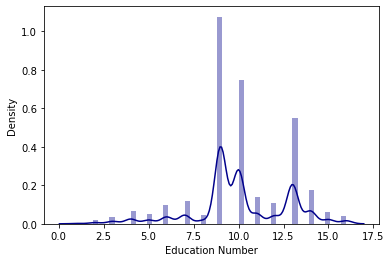

In [11]:
sns.distplot(x = df['Education_num'], axlabel='Education Number', color = 'darkblue')

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

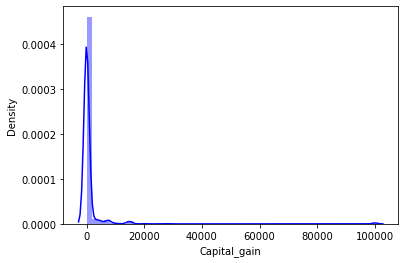

In [12]:
sns.distplot(x=df['Capital_gain'], axlabel='Capital_gain', color='Blue')

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

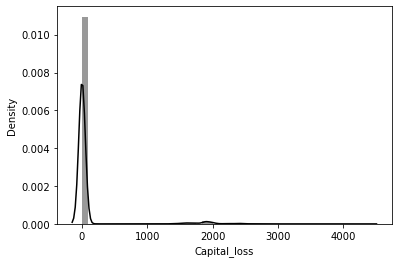

In [13]:
sns.distplot(x=df['Capital_loss'], axlabel='Capital_loss', color='Black')

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

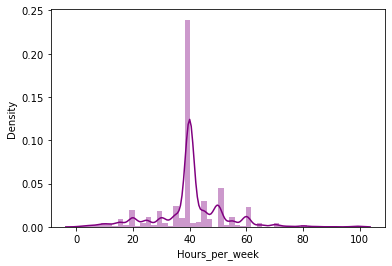

In [14]:
sns.distplot(x=df['Hours_per_week'], axlabel='Hours_per_week', color='Purple')

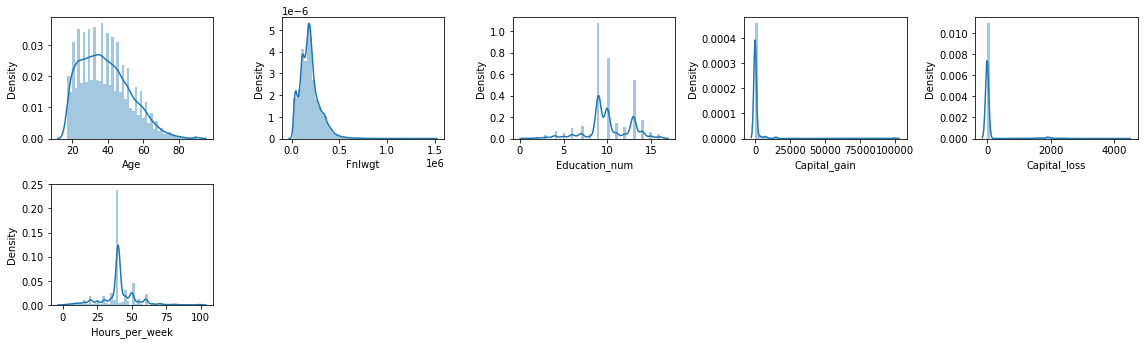

In [15]:
collist=("Age","Fnlwgt","Education_num","Capital_gain","Capital_loss","Hours_per_week")
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

Skewness is available which we needs to remove

<AxesSubplot:xlabel='Age', ylabel='count'>

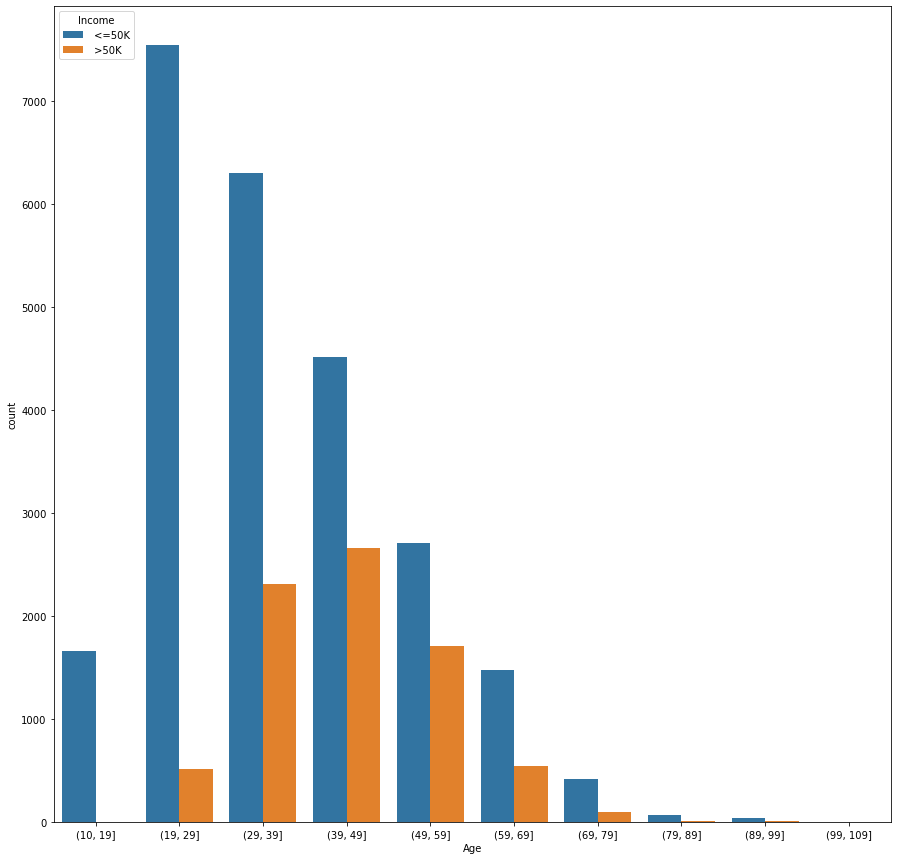

In [16]:
f, ax = plt.subplots(figsize=(15, 15))
df1 = pd.cut(x=df['Age'], bins=[10, 19, 29, 39,49,59,69,79,89,99,109])
sns.countplot(x=df1,hue=df['Income'])

The age group of 39-49 have more people which are earning more than 50k 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

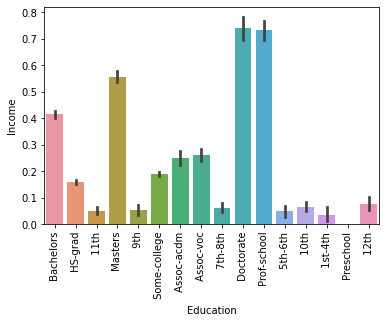

In [17]:
le=LabelEncoder()
df["Income"]=le.fit_transform(df["Income"].astype(str))
sns.barplot(x='Education',y='Income',data=df)
plt.xticks(rotation = 90)

The doctors and prof-School have high earning than any others

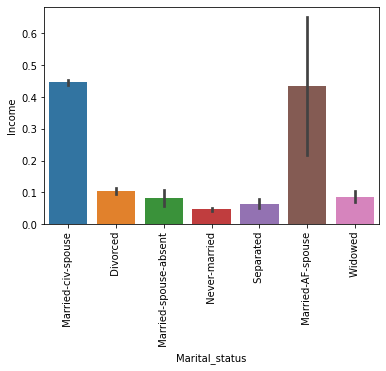

In [18]:
sns.barplot(x = df['Marital_status'], y = df['Income'])
plt.xticks(rotation = 90);

The mrried people income is more in comparison to others.

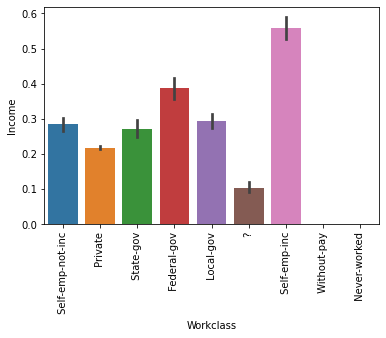

In [19]:
sns.barplot(x = df['Workclass'], y = df['Income'])
plt.xticks(rotation = 90);

The self empoloyed have higher income

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

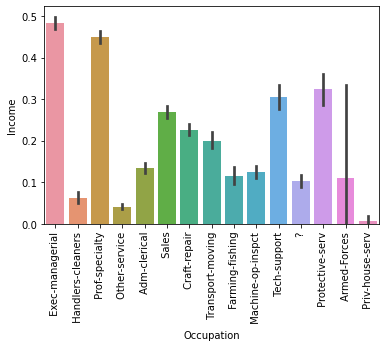

In [20]:
sns.barplot(x='Occupation',y='Income',data=df)
plt.xticks(rotation = 90)

The People at the mnagerial positions and professors-specility has high income group than others

<AxesSubplot:xlabel='Sex', ylabel='Income'>

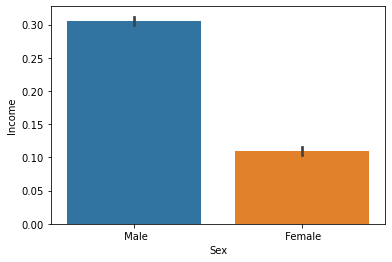

In [21]:
sns.barplot(x='Sex',y='Income',data=df)

Male has three times more income than female

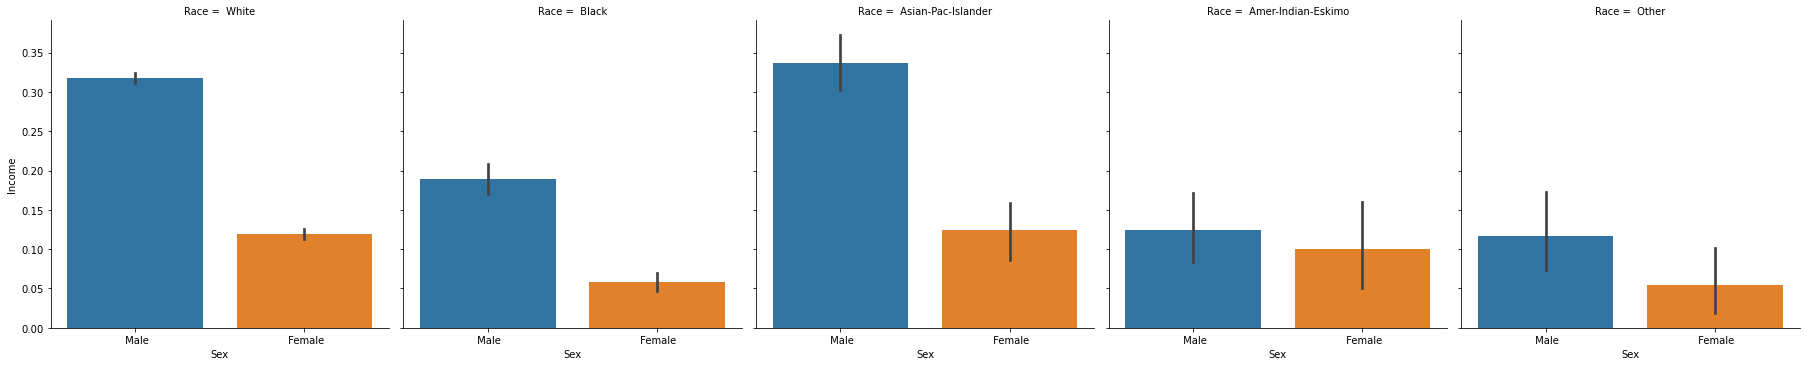

In [23]:
sns.catplot(x = 'Sex', y = 'Income', data = df, kind = 'bar', col = 'Race',
            height = 5, aspect = 1)

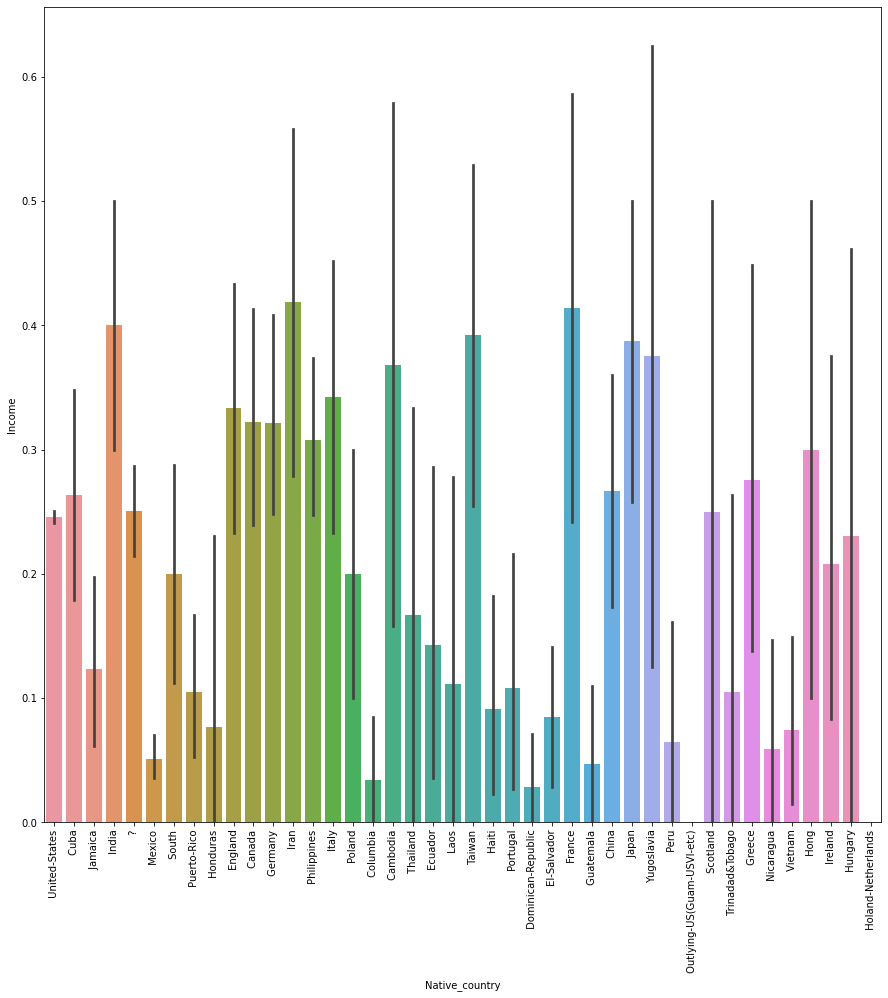

In [24]:
f, ax = plt.subplots(figsize=(15, 15)) 
sns.barplot(x='Native_country',y='Income',data=df)
plt.xticks(rotation = 90);

In [25]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [26]:
#Lets Check the skewness and remove them
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [27]:
import numpy as np
skew=("Age","Fnlwgt","Education_num","Capital_gain","Capital_loss","Hours_per_week")
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [28]:
df.skew()

Age              -0.113322
Fnlwgt           -0.842559
Education_num    -0.311630
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Income            1.212383
dtype: float64

In [29]:
df.dtypes

Age               float64
Workclass          object
Fnlwgt            float64
Education          object
Education_num       int64
Marital_status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Native_country     object
Income              int32
dtype: object

In [30]:
#Coverting object data in float/Integer by using label Encoding  
le=LabelEncoder()
df["Workclass"]=le.fit_transform(df["Workclass"].astype(str))
df["Education"]=le.fit_transform(df["Education"].astype(str))
df["Marital_status"]=le.fit_transform(df["Marital_status"].astype(str))
df["Occupation"]=le.fit_transform(df["Occupation"].astype(str))
df["Relationship"]=le.fit_transform(df["Relationship"].astype(str))
df["Race"]=le.fit_transform(df["Race"].astype(str))
df["Sex"]=le.fit_transform(df["Sex"].astype(str))
df["Native_country"]=le.fit_transform(df["Native_country"].astype(str))

In [31]:
df.dtypes

Age               float64
Workclass           int32
Fnlwgt            float64
Education           int32
Education_num       int64
Marital_status      int32
Occupation          int32
Relationship        int32
Race                int32
Sex                 int32
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Native_country      int32
Income              int32
dtype: object

Age                  AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Workclass         AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Fnlwgt            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education         AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Education_num     AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Marital_status    AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Occupation        AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Relationship         AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Race              AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Sex               AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Capital_gain      AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Capital_loss      AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Hours_per_week    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Native_country    AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Income               AxesSubplot(0.125,0.437414;

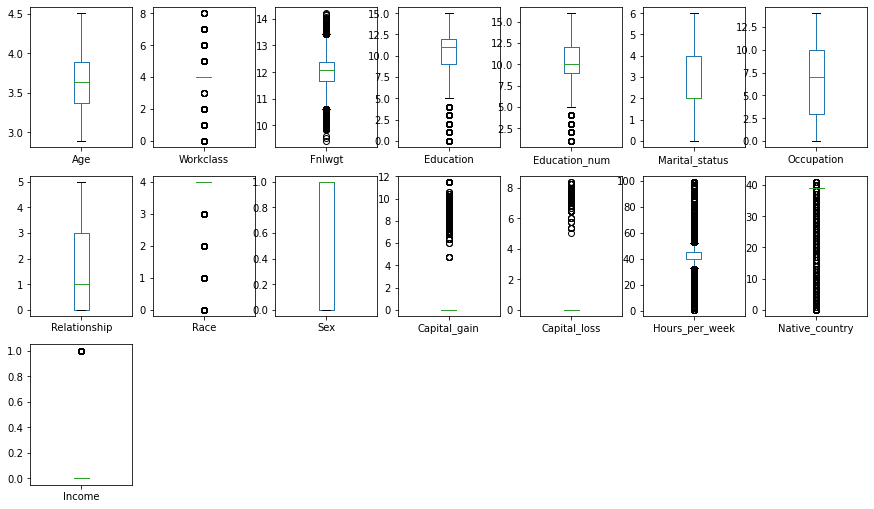

In [32]:
#Checking outliers
df.plot(kind="box",subplots=True,layout=(5,7),figsize=(15,15))

In [33]:
#Identifying outliers and removing them 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.8955433 , 1.46388339, 1.03603342, ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.12914255, 0.09012148, 0.47183429, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05883861, 0.09012148, 0.60621773, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.31182594, 0.09012148, 0.08363419, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.37948811, 0.09012148, 0.36418346, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [1.00543724, 0.77700244, 0.93014422, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [34]:
threshold=3
print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [35]:
df=df[(z<3).all(axis=1)]

In [36]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.931826,6,11.330348,9,13,2,4,0,4,1,0.0,0.0,13,39,0
1,3.663562,4,12.281398,11,9,0,6,1,4,1,0.0,0.0,40,39,0
2,3.988984,4,12.366157,1,7,2,6,0,2,1,0.0,0.0,40,39,0
4,3.637586,4,12.558780,12,14,2,4,5,4,0,0.0,0.0,40,39,0
5,3.912023,4,11.984103,6,5,3,8,1,2,0,0.0,0.0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,3.135494,4,12.644821,15,10,4,11,1,4,1,0.0,0.0,40,39,0
32555,3.332205,4,12.458010,7,12,2,13,5,4,0,0.0,0.0,38,39,0
32556,3.713572,4,11.947140,11,9,2,7,0,4,1,0.0,0.0,40,39,1
32557,4.077537,4,11.931050,11,9,6,1,4,4,0,0.0,0.0,40,39,0


In [37]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000
mean,3.598014,3.858134,11.998159,10.303701,9.962953,2.647340,6.511103,1.505590,3.782382,0.653971,0.159853,0.000195,39.596222,38.443061,0.190324
std,0.354872,1.450361,0.617230,3.934325,2.392299,1.538258,4.250220,1.599185,0.617120,0.475712,1.095148,0.031354,11.217900,2.795171,0.392564
min,2.890372,0.000000,10.091625,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,14.000000,0.000000
25%,3.332205,4.000000,11.688755,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,38.000000,39.000000,0.000000
50%,3.610918,4.000000,12.102608,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,3.871201,4.000000,12.381571,12.000000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,4.510860,8.000000,13.853340,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,8.093768,5.049856,77.000000,41.000000,1.000000


In [38]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.030299,-0.061165,0.013731,0.064016,-0.331563,-0.007714,-0.289734,0.010319,0.092915,0.043262,-0.004037,0.152900,0.029244,0.246404
Workclass,0.030299,1.000000,-0.020147,0.020887,0.049652,-0.066247,0.257258,-0.090030,0.063539,0.092342,-0.004866,0.000607,0.127281,-0.003600,0.038080
Fnlwgt,-0.061165,-0.020147,1.000000,-0.019231,-0.037956,0.025053,-0.003933,0.022889,-0.112396,0.010956,-0.009651,-0.001436,-0.022626,-0.097270,-0.004208
Education,0.013731,0.020887,-0.019231,1.000000,0.363549,-0.036480,-0.024960,-0.009008,0.024316,-0.034873,-0.008077,-0.016261,0.062124,0.085498,0.069433
Education_num,0.064016,0.049652,-0.037956,0.363549,1.000000,-0.051804,0.107916,-0.085112,0.078911,-0.005303,-0.026779,-0.010286,0.149040,0.143128,0.296505
Marital_status,-0.331563,-0.066247,0.025053,-0.036480,-0.051804,1.000000,-0.006300,0.186120,-0.084137,-0.122935,-0.001129,0.005460,-0.202806,-0.032708,-0.186286
Occupation,-0.007714,0.257258,-0.003933,-0.024960,0.107916,-0.006300,1.000000,-0.079862,0.012584,0.084252,-0.011219,0.000714,0.069353,0.010131,0.069403
Relationship,-0.289734,-0.090030,0.022889,-0.009008,-0.085112,0.186120,-0.079862,1.000000,-0.149106,-0.564423,-0.006624,-0.001963,-0.257352,-0.019179,-0.238890
Race,0.010319,0.063539,-0.112396,0.024316,0.078911,-0.084137,0.012584,-0.149106,1.000000,0.123923,0.007449,0.002190,0.054484,0.054959,0.091085
Sex,0.092915,0.092342,0.010956,-0.034873,-0.005303,-0.122935,0.084252,-0.564423,0.123923,1.000000,0.003600,-0.008536,0.231700,-0.006439,0.203414


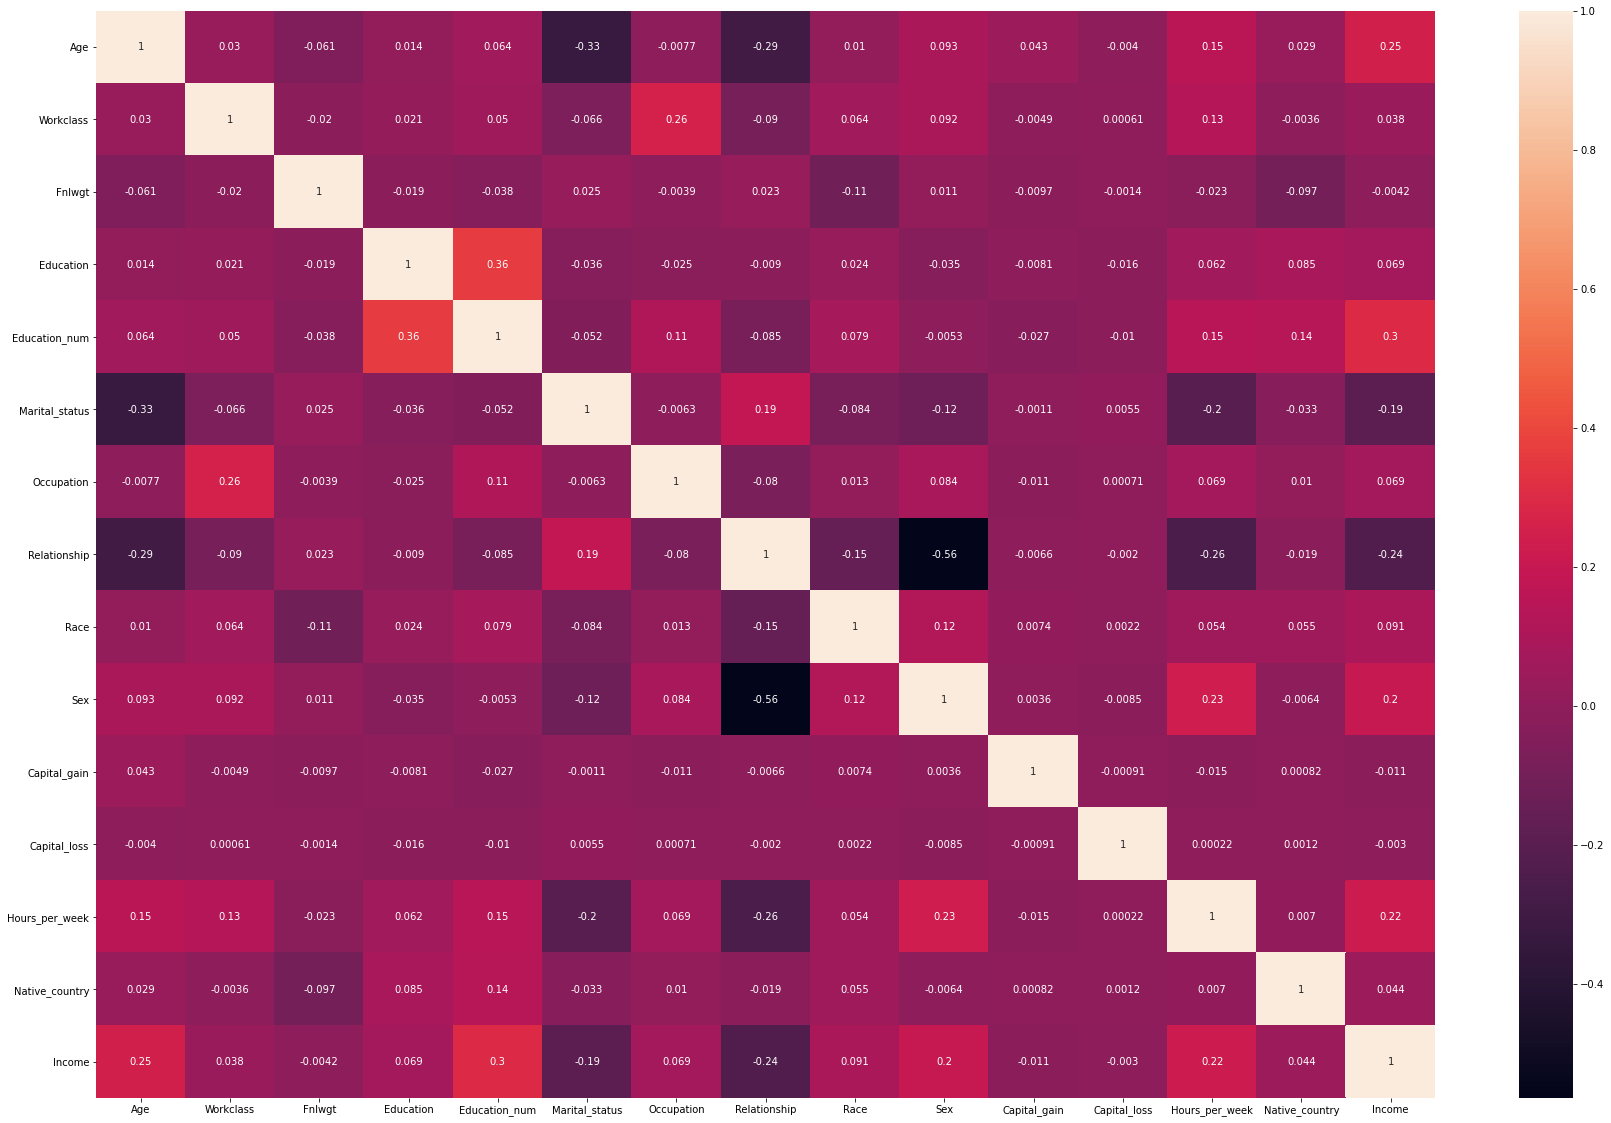

In [39]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [40]:
df.shape

(25940, 15)

# Lets now find out the prediction of the Income by using different Classification models

In [41]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [42]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,3.931826,6,11.330348,9,13,2,4,0,4,1,0.0,0.0,13,39
1,3.663562,4,12.281398,11,9,0,6,1,4,1,0.0,0.0,40,39
2,3.988984,4,12.366157,1,7,2,6,0,2,1,0.0,0.0,40,39
4,3.637586,4,12.558780,12,14,2,4,5,4,0,0.0,0.0,40,39
5,3.912023,4,11.984103,6,5,3,8,1,2,0,0.0,0.0,16,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,3.135494,4,12.644821,15,10,4,11,1,4,1,0.0,0.0,40,39
32555,3.332205,4,12.458010,7,12,2,13,5,4,0,0.0,0.0,38,39
32556,3.713572,4,11.947140,11,9,2,7,0,4,1,0.0,0.0,40,39
32557,4.077537,4,11.931050,11,9,6,1,4,4,0,0.0,0.0,40,39


In [43]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32554    0
32555    0
32556    1
32557    0
32558    0
Name: Income, Length: 25940, dtype: int32

In [44]:
y.value_counts()

0    21003
1     4937
Name: Income, dtype: int64

In [45]:
#Lets use SMOTE to remove the imbalance
from imblearn.over_sampling import SMOTE

In [46]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [47]:
np.bincount(y)

array([21003,  4937], dtype=int64)

In [48]:
trainx.value_counts()

Age       Workclass  Fnlwgt     Education  Education_num  Marital_status  Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country
3.663562  4          12.241454  11         9              2               7           0             4     1    0.0           0.0           48              39                3
3.258097  4          12.638326  9          13             4               3           1             4     1    0.0           0.0           40              26                2
3.178054  4          12.388969  4          3              4               6           1             4     1    0.0           0.0           55              26                2
3.688879  4          11.836407  9          13             2               3           0             4     1    0.0           0.0           40              39                2
2.995732  4          11.836124  15         10             4               1           3             4     0    0.0           0.0  

In [49]:
trainy.value_counts()

1    21003
0    21003
Name: Income, dtype: int64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=45)

In [51]:
LG=LogisticRegression()

In [52]:
LG.fit(x_train,y_train)

LogisticRegression()

In [53]:
LG.fit(x_train,y_train)
LG.score(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))

0.7417076654499286
[[4422 1897]
 [1358 4925]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      6319
           1       0.72      0.78      0.75      6283

    accuracy                           0.74     12602
   macro avg       0.74      0.74      0.74     12602
weighted avg       0.74      0.74      0.74     12602



In [54]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7462307570226948
[[4251 2068]
 [1130 5153]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      6319
           1       0.71      0.82      0.76      6283

    accuracy                           0.75     12602
   macro avg       0.75      0.75      0.74     12602
weighted avg       0.75      0.75      0.74     12602



In [55]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7586097444850024
[[4445 1874]
 [1168 5115]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75      6319
           1       0.73      0.81      0.77      6283

    accuracy                           0.76     12602
   macro avg       0.76      0.76      0.76     12602
weighted avg       0.76      0.76      0.76     12602



In [56]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8366132359942866
[[5232 1087]
 [ 972 5311]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6319
           1       0.83      0.85      0.84      6283

    accuracy                           0.84     12602
   macro avg       0.84      0.84      0.84     12602
weighted avg       0.84      0.84      0.84     12602



In [57]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.842009204888113
[[4808 1511]
 [ 480 5803]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      6319
           1       0.79      0.92      0.85      6283

    accuracy                           0.84     12602
   macro avg       0.85      0.84      0.84     12602
weighted avg       0.85      0.84      0.84     12602



In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8825583240755436
[[5354  965]
 [ 515 5768]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      6319
           1       0.86      0.92      0.89      6283

    accuracy                           0.88     12602
   macro avg       0.88      0.88      0.88     12602
weighted avg       0.88      0.88      0.88     12602



In [59]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8256625932391684
[[4962 1357]
 [ 840 5443]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6319
           1       0.80      0.87      0.83      6283

    accuracy                           0.83     12602
   macro avg       0.83      0.83      0.83     12602
weighted avg       0.83      0.83      0.83     12602



In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8427233772417076
[[5002 1317]
 [ 665 5618]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      6319
           1       0.81      0.89      0.85      6283

    accuracy                           0.84     12602
   macro avg       0.85      0.84      0.84     12602
weighted avg       0.85      0.84      0.84     12602



In [61]:
score=cross_val_score(LG,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.82170393 0.82748651 0.8307633  0.82941403 0.82420971]
0.826715497301465
0.0033363448763945765


In [62]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81515035 0.81341557 0.8157286  0.81052429 0.8153431 ]
0.8140323824209714
0.0019252106382704126


In [63]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79722436 0.80069391 0.79529684 0.80686199 0.79298381]
0.7986121819583654
0.004837127877057273


In [64]:
score=cross_val_score(KNN,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.827101   0.83095605 0.82845027 0.83500386 0.82825752]
0.8299537393986121
0.0028207799737743466


In [65]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85196608 0.85485736 0.85851966 0.86353123 0.85774865]
0.8573245952197379
0.0038712074666563357


In [66]:
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85601388 0.85929067 0.85986893 0.86854279 0.85505012]
0.8597532767925984
0.004766251510060163


In [67]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.84599075 0.84194295 0.84444873 0.8538936  0.8502313 ]
0.8473014649190439
0.004256994838388766


We can see that the Random forest classifier is giving the best results 88% with the cross validation score (85%) so we are proceeding the same for the prediction.

In [68]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [69]:
y_pred_prob=rf.predict_proba(x_test)[:,-1]

In [70]:
y_pred_prob

array([0.48, 0.  , 0.09, ..., 0.94, 0.9 , 0.02])

In [71]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [72]:
fpr

array([0.        , 0.00126602, 0.00237379, 0.00363982, 0.00680487,
       0.00870391, 0.0107612 , 0.01329324, 0.0164583 , 0.01978161,
       0.02199715, 0.02500396, 0.02832727, 0.03180883, 0.03418262,
       0.03639816, 0.0382972 , 0.04003798, 0.04304479, 0.04589334,
       0.04810888, 0.05048267, 0.05396423, 0.05792056, 0.06029435,
       0.0631429 , 0.06646621, 0.06931476, 0.07232157, 0.07627789,
       0.0792847 , 0.08118373, 0.08387403, 0.08672258, 0.09020415,
       0.09352746, 0.09653426, 0.10096534, 0.1041304 , 0.1098275 ,
       0.11330907, 0.11663238, 0.1205887 , 0.12486153, 0.12850135,
       0.13261592, 0.13593923, 0.14021206, 0.14448489, 0.14875771,
       0.15271404, 0.15825289, 0.16141795, 0.16632379, 0.17028011,
       0.17518595, 0.1810413 , 0.18468112, 0.18863744, 0.19338503,
       0.19702485, 0.20145593, 0.20699478, 0.21221712, 0.219022  ,
       0.22408609, 0.23073271, 0.23500554, 0.23912011, 0.246558  ,
       0.25241336, 0.25842697, 0.26254154, 0.26808039, 0.27346

In [73]:
tpr

array([0.        , 0.09008435, 0.15820468, 0.21677543, 0.27104886,
       0.32182079, 0.36145154, 0.40076397, 0.43705236, 0.47127169,
       0.49657807, 0.52092949, 0.5417794 , 0.56247016, 0.58443419,
       0.60353334, 0.62167754, 0.63807099, 0.65350947, 0.66735636,
       0.68120325, 0.69425434, 0.70810123, 0.72210727, 0.73324845,
       0.7456629 , 0.75855483, 0.77096928, 0.7803597 , 0.78911348,
       0.79898138, 0.80869012, 0.81903549, 0.82667516, 0.83367818,
       0.84036288, 0.84561515, 0.85118574, 0.85611969, 0.86439599,
       0.87060322, 0.87505968, 0.88110775, 0.88620086, 0.89208977,
       0.89781951, 0.9025943 , 0.90689161, 0.91055228, 0.91469043,
       0.91803279, 0.92185262, 0.92424001, 0.92710489, 0.93187968,
       0.93538119, 0.93824606, 0.94206589, 0.94524908, 0.94859144,
       0.95145631, 0.95352539, 0.9562311 , 0.95830018, 0.96021009,
       0.96180169, 0.96275664, 0.96418908, 0.96657648, 0.96848639,
       0.97007799, 0.97119211, 0.97262454, 0.97342034, 0.97453

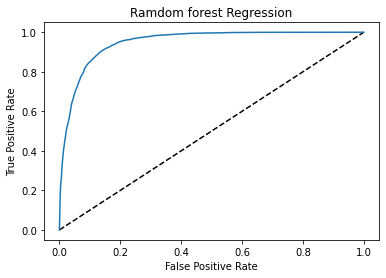

In [74]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Ramdom forest Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Ramdom forest Regression")
plt.show()

# Saving the model

In [76]:
import pickle
filename="CensusIncome.pkl"
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([0, 0, 0, ..., 1, 1, 0])